## Flow Diagram:

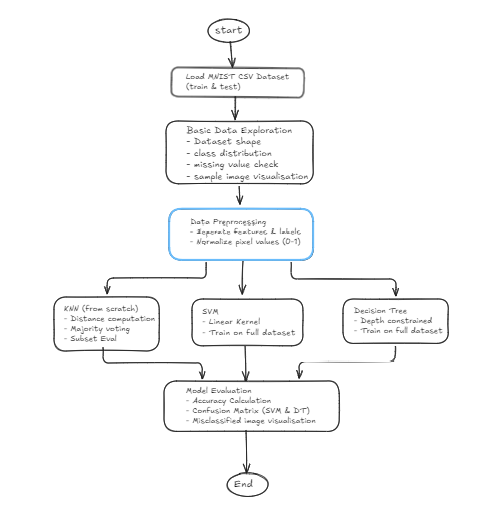

In [1]:
!pip install -q kagglehub

In [2]:
import kagglehub

# Download latest version MNIST dataset
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mnist-in-csv' dataset.
Path to dataset files: /kaggle/input/mnist-in-csv


In [3]:
import os
import pandas as pd

print(os.listdir(path))

['mnist_test.csv', 'mnist_train.csv']


In [4]:
# Load the dataset and explore
train_filepath = os.path.join(path, "mnist_train.csv")
test_filepath = os.path.join(path, "mnist_test.csv")

train = pd.read_csv(train_filepath)
test = pd.read_csv(test_filepath)
print("Train: ",train.shape)
print("Test: ",test.shape)
print(train.head())


Train:  (60000, 785)
Test:  (10000, 785)
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [18]:
# Checking Class Distribution
print("Class distribution:\n", train['label'].value_counts())


Class distribution:
 label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64


In [19]:
# Checking any missing values
print("Missing values in train:", train.isnull().sum().sum())
print("Missing values in test:", test.isnull().sum().sum())

Missing values in train: 0
Missing values in test: 0


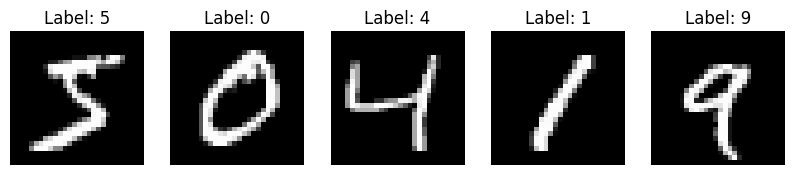

In [7]:
# 5 Sample Image showcase
fig, axes = plt.subplots(1,5, figsize=(10,2))
for i, ax in enumerate(axes):
    img = train.iloc[i, 1:].values.reshape(28,28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {train.iloc[i,0]}")
    ax.axis('off')
plt.show()


In [8]:
# Normalising feature values between 0 and 1 and seperating features and labels

X_train = train.iloc[:, 1:].values / 255.0
y_train = train.iloc[:, 0].values

X_test = test.iloc[:, 1:].values / 255.0
y_test = test.iloc[:, 0].values


In [9]:
# KNN Impletation from Scratch

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X:
            distances = np.linalg.norm(self.X_train - x, axis=1)
            k_indices = np.argsort(distances)[:self.k]
            k_labels = self.y_train[k_indices]
            predictions.append(np.bincount(k_labels).argmax())
        return np.array(predictions)


In [10]:
# Fitting the Model for the data
knn = KNN(k=3)
knn.fit(X_train, y_train)

In [11]:
from sklearn.metrics import accuracy_score

# limited test samples to first 300 for speed
y_pred_knn = knn.predict(X_test[:300])

print("KNN (from scratch) Accuracy:", accuracy_score(y_test[:300], y_pred_knn))

KNN (from scratch) Accuracy: 0.9833333333333333


### Note on KNN Evaluation

The KNN model implemented from scratch was evaluated on a subset of 300 test samples.
While this subset achieved an accuracy of approximately 98%, this result does not represent the overall performance of KNN on the full test set.

Due to the high computational complexity of KNN (O(n) distance calculations per test sample), evaluating the entire test dataset without optimized libraries would be inefficient.
The subset evaluation is sufficient to verify correctness of the implementation and demonstrate expected performance behavior.


In [12]:
from sklearn.svm import SVC
# Fitting the SVM Model
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.9404


### Why Linear SVM instead of RBF

Although the RBF kernel can model non-linear decision boundaries, it is computationally expensive for high-dimensional data such as flattened 28×28 images (784 features). Without prior dimensionality reduction (e.g., PCA), RBF SVM requires significantly more time and memory for training and hyperparameter tuning.  
Therefore, a linear kernel was chosen as a strong and efficient baseline, which performs well on MNIST while keeping the pipeline simple and interpretable.


SVM Confusion Matrix: 
[[ 957    0    4    1    1    6    9    1    0    1]
 [   0 1122    3    2    0    1    2    1    4    0]
 [   8    6  967   11    3    3    7    8   17    2]
 [   4    3   16  947    1   16    0    9   12    2]
 [   1    1   10    1  942    2    4    2    3   16]
 [  10    4    3   36    6  803   13    1   14    2]
 [   9    2   13    1    5   16  910    1    1    0]
 [   1    8   21   10    8    1    0  957    3   19]
 [   8    4    6   25    7   26    6    7  877    8]
 [   7    7    2   11   33    4    0   18    5  922]]


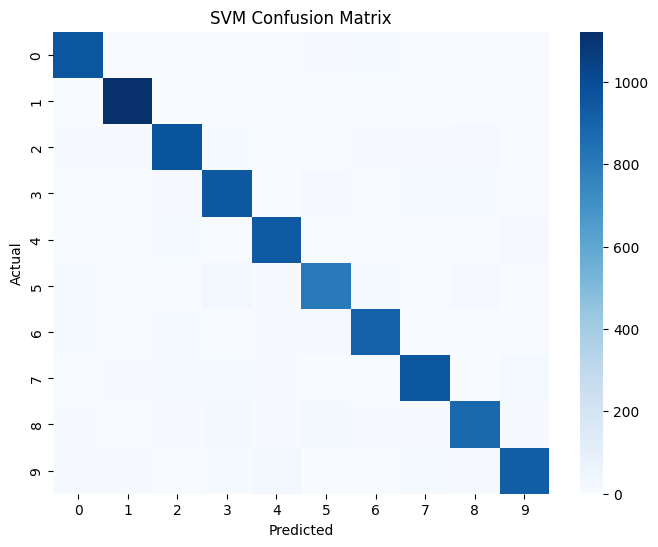

In [13]:
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix: ")
print(cm_svm)
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=False, cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


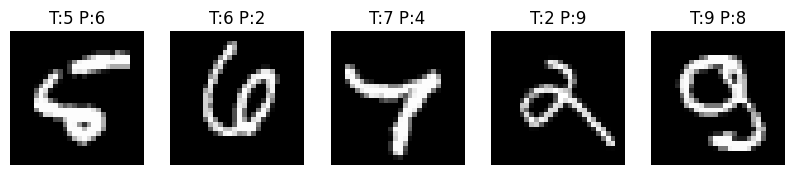

In [14]:
# 5 Misclassified Image Samples by SVM

mis_idx = np.where(y_test != y_pred_svm)[0][:5]

fig, axes = plt.subplots(1,5, figsize=(10,2))
for i, idx in enumerate(mis_idx):
    axes[i].imshow(X_test[idx].reshape(28,28), cmap='gray')
    axes[i].set_title(f"T:{y_test[idx]} P:{y_pred_svm[idx]}")
    axes[i].axis('off')
plt.show()


In [15]:
from sklearn.tree import DecisionTreeClassifier
#  Fitting the SVM Model
dt = DecisionTreeClassifier(max_depth=16)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("DT Accuracy:", accuracy_score(y_test, y_pred_dt))

DT Accuracy: 0.8823


DT Confusion Matrix: 
[[ 928    0    9    3    4   11    8    3   10    4]
 [   3 1091   10   10    1    6    6    5    2    1]
 [  10    9  889   26   15   10   14   28   22    9]
 [   9    4   27  859    5   46    4   10   23   23]
 [   8    1   12    5  859   11   16    6   21   43]
 [  13    7    6   36    7  755   20    5   29   14]
 [  22    3   16    8   22   16  847    1   20    3]
 [   2   10   22   11    7    6    1  940    8   21]
 [  11    9   28   37   16   27   23   11  781   31]
 [  18    3    8   18   36    9    5   17   21  874]]


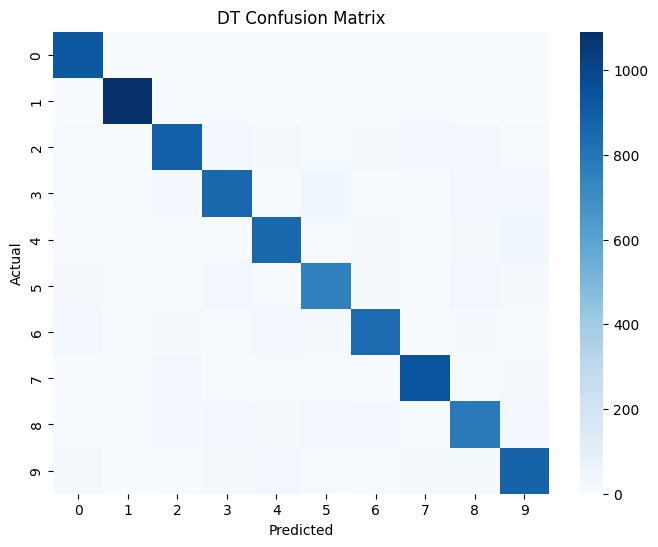

In [16]:
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_test, y_pred_dt)
print("DT Confusion Matrix: ")
print(cm_dt)
plt.figure(figsize=(8,6))
sns.heatmap(cm_dt, annot=False, cmap="Blues")
plt.title("DT Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


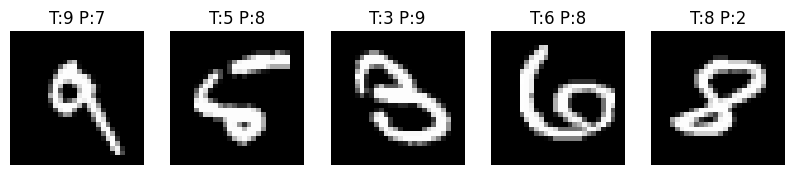

In [17]:
# 5 Misclassified Image Samples by DT

mis_idx = np.where(y_test != y_pred_dt)[0][:5]

fig, axes = plt.subplots(1,5, figsize=(10,2))
for i, idx in enumerate(mis_idx):
    axes[i].imshow(X_test[idx].reshape(28,28), cmap='gray')
    axes[i].set_title(f"T:{y_test[idx]} P:{y_pred_dt[idx]}")
    axes[i].axis('off')
plt.show()


### Note on KNN Evaluation and Confusion Matrix

The KNN model implemented from scratch was evaluated on a small subset of test samples to verify correctness of the implementation.
Since this subset is not intended to represent the full test distribution, a confusion matrix was not generated for KNN,
as it could lead to misleading class-wise interpretations.

Confusion matrices were instead generated for SVM and Decision Tree models, which were evaluated on the full test dataset.


## Model Comparison and Analysis
Among the evaluated models, Support Vector Machine (SVM) achieved the highest accuracy. This is expected because SVM performs well in high-dimensional feature spaces such as flattened image pixels. The KNN model implemented from scratch showed strong performance on a small test subset, validating the correctness of the implementation, but was not evaluated on the full dataset due to computational inefficiency. The Decision Tree model achieved comparatively lower accuracy, likely due to overfitting and its limited ability to generalize complex decision boundaries from raw pixel data.

Most misclassifications occurred between visually similar digits such as 3 and 5 or 4 and 9, where handwriting styles overlap. These ambiguities highlight the limitations of using raw pixel values without feature extraction.

Model performance could be improved through dimensionality reduction techniques such as PCA, hyperparameter tuning, or by combining multiple models using ensemble methods.